# Bike Sharing Linear Regression Model
### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

Essentially, the company wants —
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.
- To create a linear model that quantitatively relates the demand for shared bikes with the available independent variables.

## Content:
* [Import required libraries](#import-required-libraries)
* [Reading and Understanding the Data](#read-understand-data)
* [Visualising the Data](#visualize_data)
* [Data Preparation](#data_preparation)
* [Splitting the Data into Training and Testing Sets](#train_test_set)
* [Building a linear model](#build_linear_model)
* [Residual Analysis of the train data](#residual_analysis)
* [Making Predictions Using the Final Model](#predict)
* [Model Evaluation](#model_evaluation)

## Step 1: Import required libraries <a class="anchor" id="import-required-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data <a class="anchor" id="read-understand-data"></a>

In [3]:
# Read the dataset day.csv
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect the various aspects of the bike_df dataframe

In [4]:
bike_df.shape

# Observation
# The dataset contains 730 rows and 16 columns

(730, 16)

In [5]:
bike_df.info()

# Observation
# There are no column with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe()

# Observation
# By looking at the min, max and other values we can say that there are no outliers

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Drop unwanted columns from our dataset

In [7]:
# Drop column "instant" as it contains only index values
bike_df.drop(columns=['instant'], inplace=True)

In [8]:
# Drop column "dteday" as seperate columns exist for "mnth" and "yr"
bike_df.drop(columns=['dteday'], inplace=True)

In [9]:
# Drop column casual & registered as both these columns contains the count of bike booked by different categories of customers. 
# Our objective is to find the total count of bikes and not by specific category.
bike_df.drop(columns=['casual', 'registered'], inplace=True)

In [10]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Convert feature values into categorical values for better understanding
The Feature variables are
- season
- mnth
- weekday
- weathersit

In [11]:
# Column "season"
# 1:spring, 2:summer, 3:fall, 4:winter
bike_df['season'] = bike_df[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
bike_df['season'].head()

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season, dtype: object

In [12]:
# Column "mnth"
# 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
bike_df['mnth'] = bike_df[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))
bike_df['mnth'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

In [13]:
# Column "weekday"
# 0:Mon, 1:Tue, 2:Wed, 3:Thu, 4:Fri, 5:Sat, 6:Sun
bike_df['weekday'] = bike_df[['weekday']].apply(lambda x: x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}))
bike_df['weekday'].head()

0    Sat
1    Sun
2    Mon
3    Tue
4    Wed
Name: weekday, dtype: object

In [14]:
# Column weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bike_df['weathersit'] = bike_df[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'}))
bike_df['weathersit'].head()

0    Cloudy
1    Cloudy
2     Clear
3     Clear
4     Clear
Name: weathersit, dtype: object

## Step 3: Visualising the Data <a class="anchor" id="visualize_data"></a>

### Visualising Numeric Variables

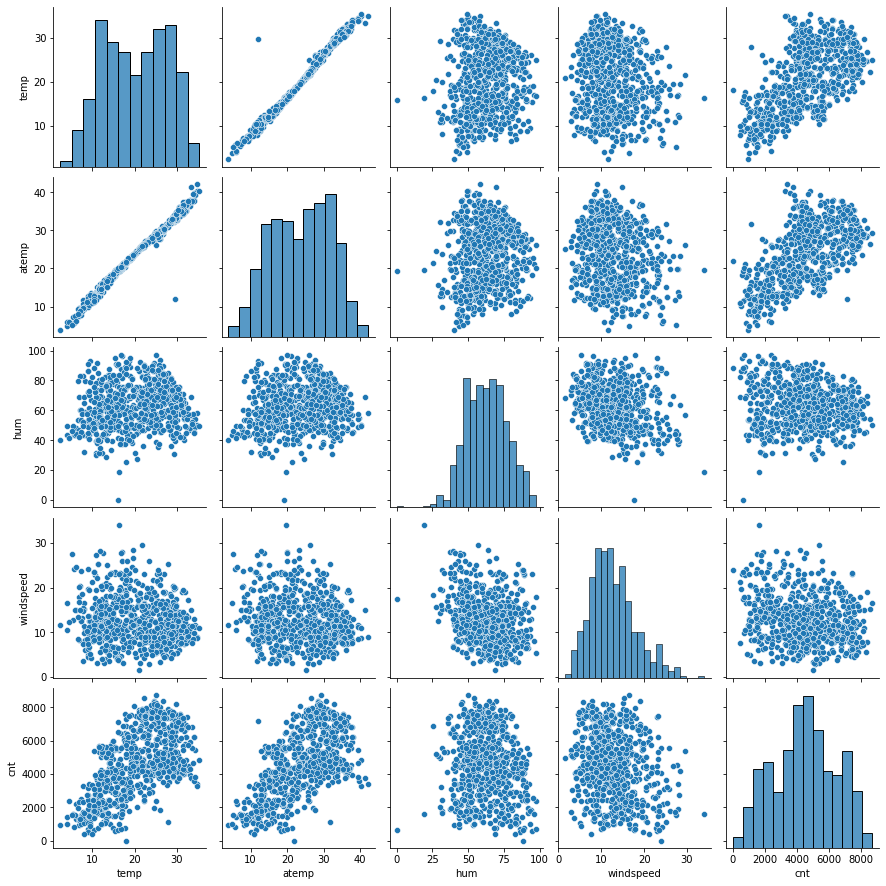

In [15]:
# Let's make a pairplot of all the numeric variables
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(data=bike_df[num_var])
plt.show()

# Observation
# We see that a linear behaviour exist between target variable "cnt" 
# and independent variable "temp", "atemp", "casual" and "registered" variables
# Hence we can build a Multi Linear Regression Model

#### Visualising Categorical Variables

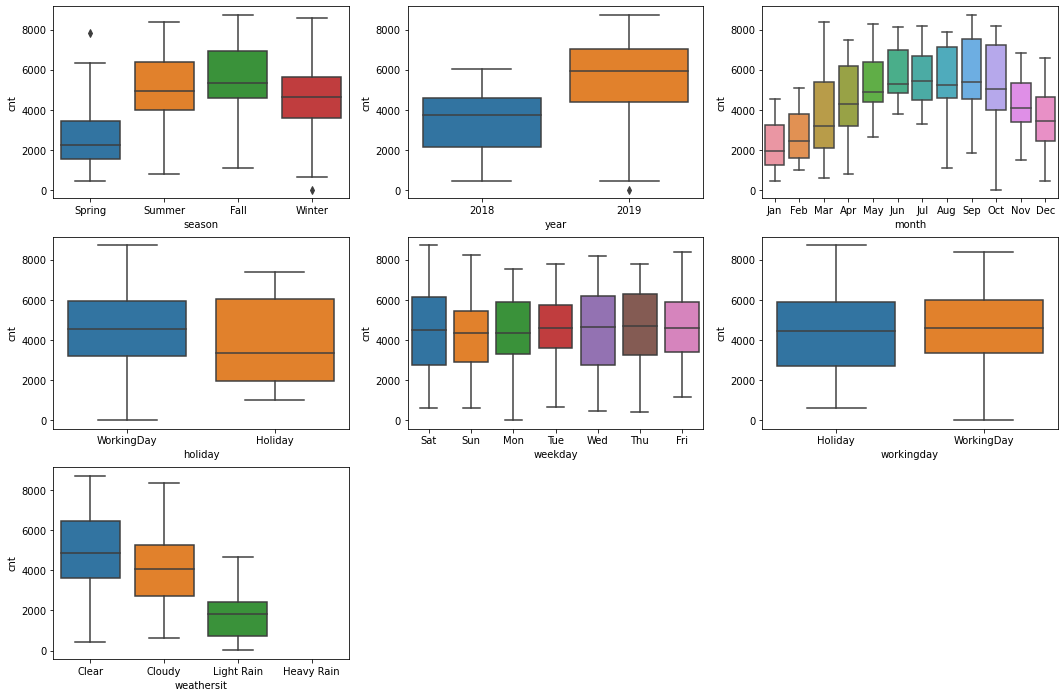

In [16]:
# Let's make a boxplot for all categorical variables.
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.boxplot(data=bike_df, x='season', y='cnt', order=['Spring','Summer','Fall','Winter'])

plt.subplot(3,3,2)
sns.boxplot(data=bike_df, x='yr', y='cnt')
plt.xticks(ticks=[0,1], labels=[2018,2019])
plt.xlabel('year')

plt.subplot(3,3,3)
sns.boxplot(data=bike_df, x='mnth', y='cnt')
plt.xlabel('month')

plt.subplot(3,3,4)
sns.boxplot(data=bike_df, x='holiday', y='cnt')
plt.xticks(ticks=[0,1], labels=['WorkingDay', 'Holiday'])

plt.subplot(3,3,5)
sns.boxplot(data=bike_df, x='weekday', y='cnt')

plt.subplot(3,3,6)
sns.boxplot(data=bike_df, x='workingday', y='cnt')
plt.xticks(ticks=[0,1], labels=['Holiday', 'WorkingDay'])

plt.subplot(3,3,7)
sns.boxplot(data=bike_df, x='weathersit', y='cnt', order=['Clear','Cloudy','Light Rain','Heavy Rain'])
plt.show()

# Observation
# Fall is the most preferred season for Bike Sharing followed by Summer, Winter and Spring
# Year 2019 had more demand compared to 2018
# Clear sky is most preferred weathersit for Bike Sharing followed by Cloudy and Light Rain

## Step 4: Data Preparation <a class="anchor" id="data_preparation"></a>
- The dtaset has few columns with categorical values.

- In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to `dummy variables`.

In [17]:
# Get the dummy variables for the feature variable 'season'
season_dummy = pd.get_dummies(bike_df['season'], drop_first=True)
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
# Get the dummy variables for the feature variable 'mnth'
mnth_dummy = pd.get_dummies(bike_df['mnth'], drop_first=True)
mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [19]:
# Get the dummy variables for the feature variable 'weekday'
weekday_dummy = pd.get_dummies(bike_df['weekday'], drop_first=True)
weekday_dummy.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [20]:
# Get the dummy variables for the feature variable 'weathersit'
weathersit_dummy = pd.get_dummies(bike_df['weathersit'], drop_first=True)
weathersit_dummy.head()

,Cloudy,Light Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [21]:
# Add the results to the original bike_df dataframe
bike_df = pd.concat([bike_df, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy], axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Drop 'season', 'mnth', 'weekday' and 'weathersit' as we have created the dummy variables for it
feature_var = ['season', 'mnth', 'weekday', 'weathersit']
bike_df.drop(columns=feature_var, inplace=True)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## Step 5: Splitting the Data into Training and Testing Sets <a class="anchor" id="train_test_set"></a>

In [23]:
df_train, df_test = train_test_split(bike_df, train_size=0.7, test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

Here we can see that except for columns like `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered` and `cnt` all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will be useing `MinMax` scaling.

In [24]:
# Instantiate an object
scaler = MinMaxScaler()

# Apply scaler() to all the columns except 'dummy' variables
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit and Transform
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 6: Building a linear model <a class="anchor" id="build_linear_model"></a>

### Visualising Correlation between Variables

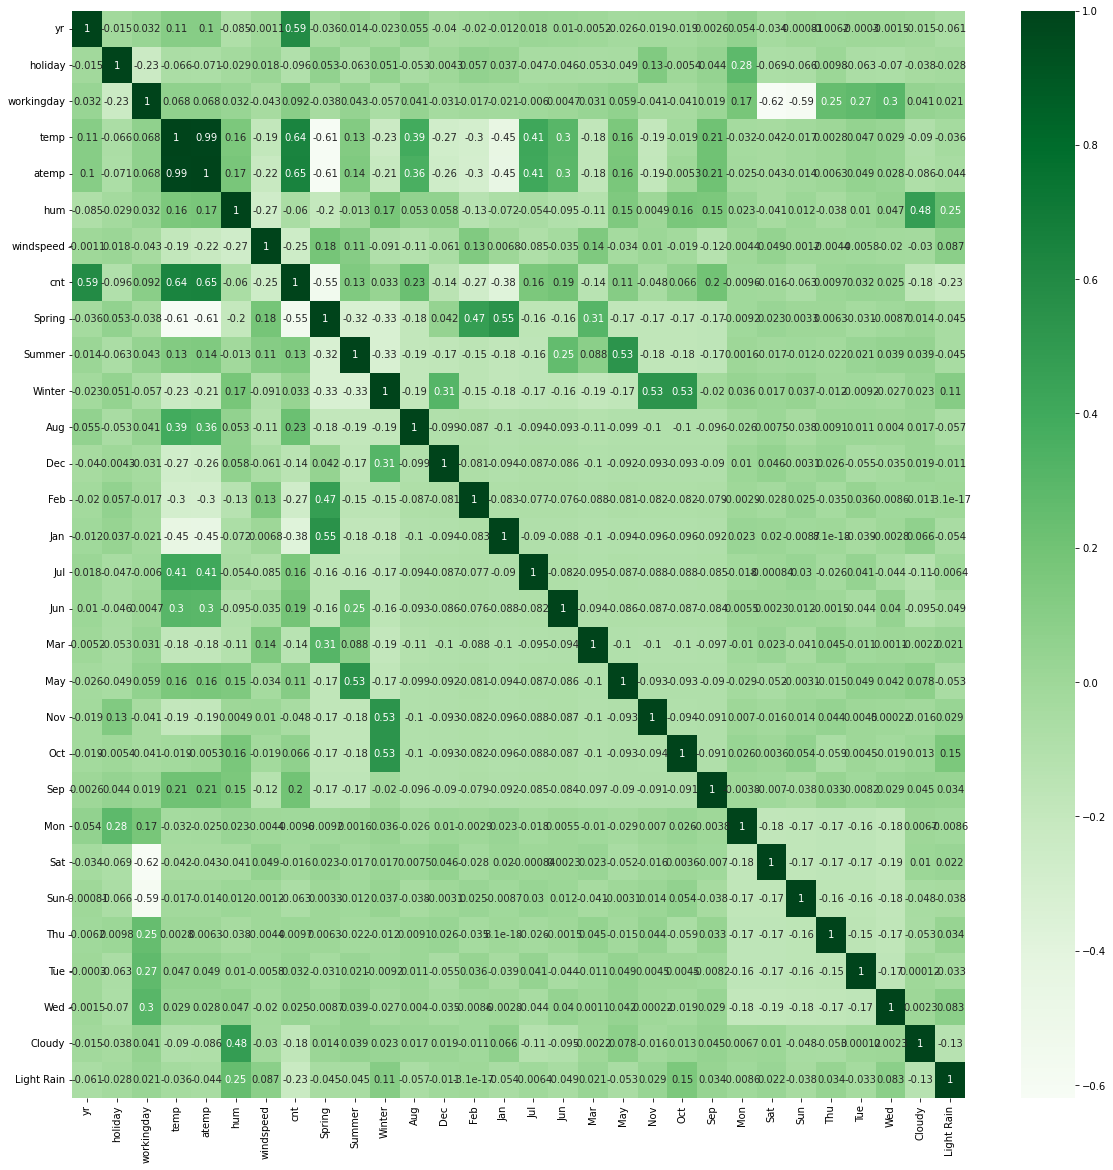

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df_train.corr(), annot=True, cmap='Greens')
plt.show()

### Create X and Y sets for the model building

In [27]:
y_train = df_train.pop('cnt')
X_train = df_train

### Use `LinearRegression` function from SciKit Learn for its compatibility with `RFE`

In [28]:
# Create an object of linear regression
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# See the param
print(lm.coef_)
print(lm.intercept_)

[ 2.32207596e-01 -1.54578677e+13 -1.54578677e+13 -1.76538949e-01
  5.94231727e-01 -2.03090747e-01 -2.36080651e-01  1.82406014e-01
  2.40088268e-01  2.62476287e-01  3.32989289e-01 -7.81773307e-02
  4.37639970e-02 -4.27521675e-02  2.12108811e-01  7.69757225e-02
 -9.08679395e-02  1.29799810e-01  6.76573820e-02  9.34493039e-02
  2.54059064e-01 -1.67853885e-01 -1.54578677e+13 -1.54578677e+13
 -1.55978852e-01 -5.21562426e-02 -7.69756261e-02 -6.29447501e-02
 -2.33019783e-01]
15457867694406.4


### RFE

In [29]:
# Run RFE with output number of variable equal to 10
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 9),
 ('Feb', False, 4),
 ('Jan', False, 15),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 3),
 ('May', False, 13),
 ('Nov', False, 8),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 11),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 6),
 ('Tue', False, 14),
 ('Wed', False, 5),
 ('Cloudy', False, 12),
 ('Light Rain', True, 1)]

In [31]:
# Top 10 variables suggested by RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jul', 'Jun', 'Sep', 'Sat', 'Sun', 'Light Rain'],
      dtype='object')


### Building model using statsmodel, for the detailed statistics

In [32]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Jul,Jun,Sep,Sat,Sun,Light Rain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,0


### Model 1

In [33]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          9.61e-186
Time:                        19:41:56   Log-Likelihood:                 503.73
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     495   BIC:                            -914.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2299      0.028      8.253      0.0

### Looking at the p-values, it looks like some of the variables aren't really significant.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [34]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,48.74
12,Sat,11.78
13,Sun,11.25
6,Spring,5.02
3,temp,3.87
8,Winter,3.45
1,holiday,2.81
7,Summer,2.66
9,Jul,1.58
11,Sep,1.32


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.434`. Let's go ahead and drop this variables

In [35]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop(columns=['holiday'])

### Model 2

In [36]:
# Add constant
X_train_sm = sm.add_constant(X)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          9.61e-186
Time:                        19:41:56   Log-Likelihood:                 503.73
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     495   BIC:                            -914.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2221      0.042      5.226      0.0

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.02
2,temp,19.29
1,workingday,18.30
4,windspeed,4.90
11,Sat,4.89
12,Sun,4.71
5,Spring,4.59
7,Winter,3.51
6,Summer,3.04
0,yr,2.09


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Sun` as it has a very high p-value of `0.076`. Let's go ahead and drop this variables

In [38]:
# Dropping highly correlated variables and insignificant variables
X = X.drop(columns=['Sun'])

### Model 3

In [39]:
# Add constant
X_train_sm = sm.add_constant(X)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          6.35e-186
Time:                        19:41:56   Log-Likelihood:                 501.41
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     496   BIC:                            -915.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2714      0.036      7.594      0.0

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,20.44
2,temp,16.74
1,workingday,4.71
4,windspeed,4.71
5,Spring,3.88
7,Winter,3.14
6,Summer,2.82
0,yr,2.09
11,Sat,1.83
8,Jul,1.69


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF of `11.42`. Let's go ahead and drop this variables

In [41]:
# Dropping highly correlated variables and insignificant variables
X = X.drop(columns=['hum'])

### Model 4

In [42]:
# Add constant
X_train_sm = sm.add_constant(X)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# Summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          5.35e-171
Time:                        19:41:57   Log-Likelihood:                 463.21
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     497   BIC:                            -845.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1098      0.033      3.305      0.0

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Observation
# The VIFs and p-values both are within an acceptable range. 
# So we go ahead and can make our predictions using Model 4.

,Features,VIF
2,temp,7.59
3,windspeed,4.66
1,workingday,4.61
4,Spring,2.35
5,Summer,2.28
0,yr,2.07
6,Winter,1.92
10,Sat,1.82
7,Jul,1.68
9,Sep,1.37


## Step 7: Residual Analysis of the train data <a class="anchor" id="residual_analysis"></a>

Check 
- Normality of error
- Homoscedasticity
- Independence of errors

In [44]:
# Compute residual
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred

Mean of Residual is:  5.059133939664439e-16


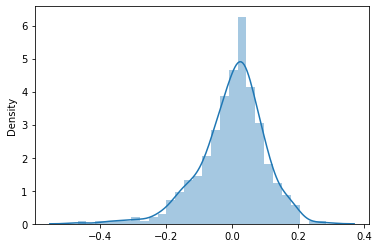

In [45]:
# Compute mean of residual 
print('Mean of Residual is: ',res.mean())

# Plot residual and see its distribution
sns.distplot(res)
plt.show()

# Observation
# Residual Mean is 0
# The error distribution is normal

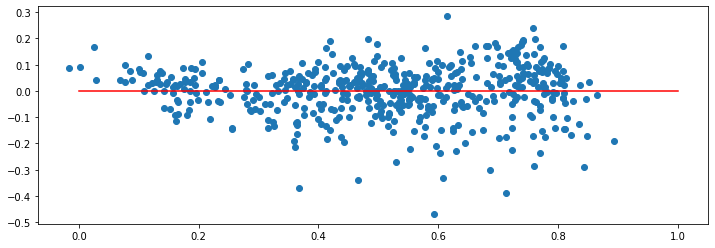

In [58]:
# Homoscedasticity
plt.figure(figsize=(12,4))
plt.scatter(y_train_pred, res)
plt.plot([0,1],[0,0], 'r')
plt.show()

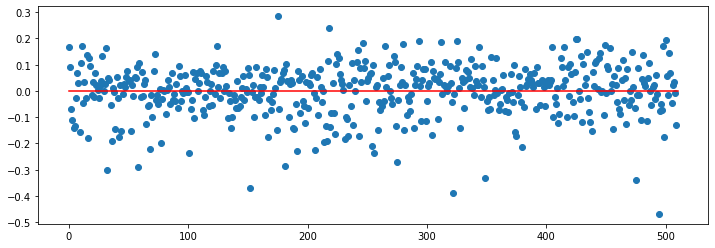

In [46]:
# Independence of errors
plt.figure(figsize=(12,4))
c = [i for i in range(0, 510, 1)]
plt.scatter(c, res)
plt.plot([0,510],[0,0],'r')
plt.show()

# Observation
# The distribution of error has constant variance
# Errors do not show any pattern

## Step 8: Making Predictions Using the Final Model <a class="anchor" id="predict"></a>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Model 4.

### Applying the scaling on the test sets

In [47]:
# Apply scaler() to all the columns except 'dummy' variables
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Transform
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [48]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [49]:
y_test = df_test.pop('cnt')
x_test = df_test

In [50]:
# List of columns on which model is built
col_model = list(X.columns)

### Predict

In [51]:
# Creating X_test dataframe with RFE selected variables
x_test_sm = x_test[col_model]

# Add constant
x_test_sm = sm.add_constant(x_test_sm)

# Predict
y_test_pred = lr_model.predict(x_test_sm)

## Step 9: Model Evaluation <a class="anchor" id="model_evaluation"></a>

In [52]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print('r2 value for test set is: ',r2)

r2 value for test set is:  0.7863760971171843



### The equation of our best fitted line is:

$ cnt = 0.2331  \times  yr + 0.0515  \times  workingday + 0.6022 \times temp - 0.1388 \times windspeed + 0.1052 \times Winter + 0.0617 \times Sat - 0.2546 \times Light Rain + 0.0531 $
